In [30]:
import pickle
import warnings

import numpy as np
import pandas as pd

from tqdm import tqdm
from glob import glob
from itertools import combinations, product
from scipy.spatial import distance

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [3]:
warnings.simplefilter('ignore')
alt.data_transformers.enable('default', max_rows=None)

DataTransformerRegistry.enable('default')

In [4]:
embeds, rows = [], []

for path in tqdm(glob('../data/b7-embeds/*.p')):
    with open(path, 'rb') as fh:
        
        lines = pickle.load(fh)
        
        for line in lines:
            title = ' '.join(line['tokens'])
            embeds.append(line['embedding'])
            rows.append((line['label'], title))

100%|██████████| 100/100 [00:01<00:00, 67.93it/s]


In [5]:
embeds = np.stack(embeds)

In [6]:
df = pd.DataFrame(rows, columns=('label', 'title'))

# Pairwise distances

In [21]:
def mean_pw_ds(domain, n=1000):
    
    d_embeds = embeds[df[df.label==domain].index][:n]
    
    ds = []
    for v1, v2 in tqdm(combinations(d_embeds, 2)):
        ds.append(distance.cosine(v1, v2))
        
    return ds

499500it [00:28, 17651.20it/s]


apnews.com


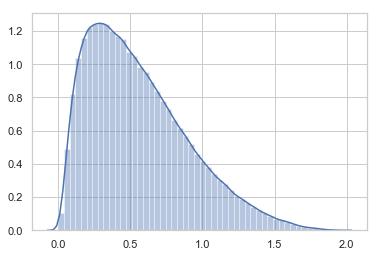

499500it [00:27, 18204.95it/s]


reuters.com


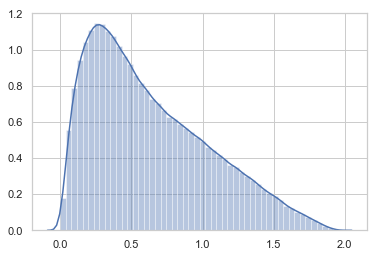

499500it [00:27, 18327.21it/s]


huffingtonpost.com


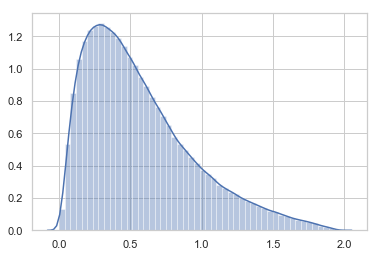

499500it [00:27, 18248.14it/s]


nytimes.com


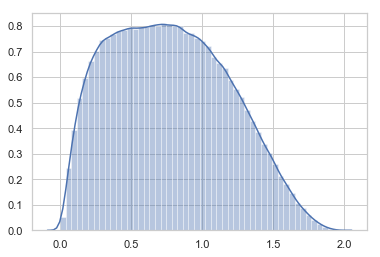

499500it [00:27, 18120.94it/s]


foxnews.com


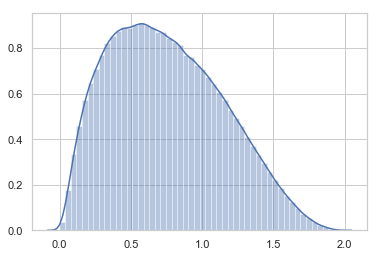

499500it [00:27, 17990.39it/s]


cnn.com


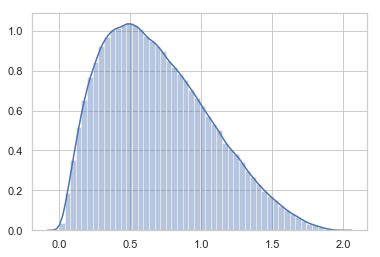

499500it [00:29, 16840.18it/s]


breitbart.com


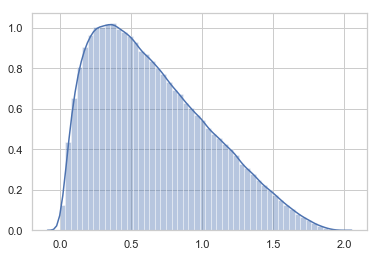

In [22]:
for domain in df.label.unique():
    ds = mean_pw_ds(domain)
    print(domain)
    sns.distplot(ds)
    plt.show()

# Distances from group mean

In [28]:
def ds_from_mean(domain):
    
    d_embeds = embeds[df[df.label==domain].index]
    
    mean = d_embeds.mean(0)
    
    ds = []
    for v in tqdm(d_embeds):
        ds.append(distance.cosine(mean, v))
        
    return ds

100%|██████████| 14178/14178 [00:00<00:00, 17366.94it/s]


apnews.com


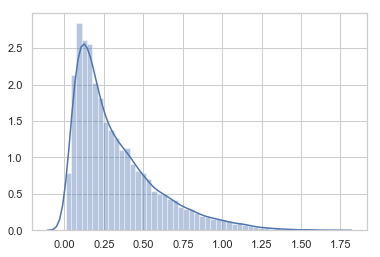

100%|██████████| 14407/14407 [00:00<00:00, 17610.21it/s]


reuters.com


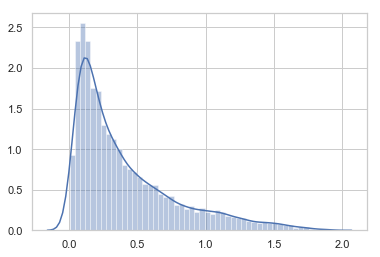

100%|██████████| 14283/14283 [00:00<00:00, 17458.43it/s]


huffingtonpost.com


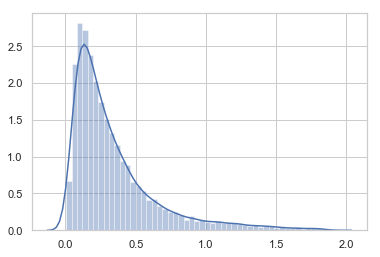

100%|██████████| 14205/14205 [00:00<00:00, 17383.37it/s]


nytimes.com


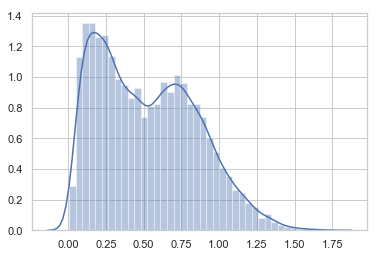

100%|██████████| 14285/14285 [00:00<00:00, 18015.78it/s]


foxnews.com


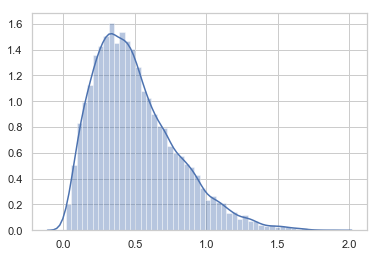

100%|██████████| 14392/14392 [00:00<00:00, 17744.88it/s]


cnn.com


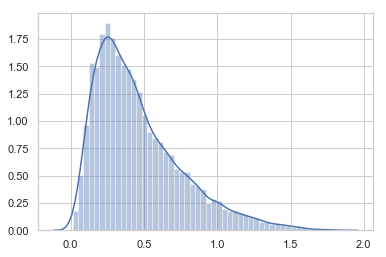

100%|██████████| 14250/14250 [00:00<00:00, 17265.74it/s]


breitbart.com


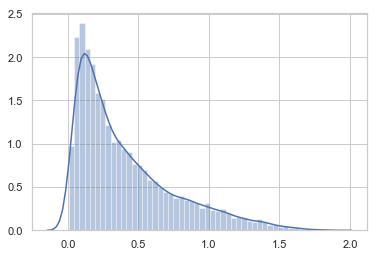

In [29]:
for domain in df.label.unique():
    ds = ds_from_mean(domain)
    print(domain)
    sns.distplot(ds)
    plt.show()

# Across-group pairwise distanecs

In [62]:
def pw_product_ds(d1, d2, n=200):
    
    d1_embeds = embeds[df[df.label==d1].index][:n]
    d2_embeds = embeds[df[df.label==d2].index][:n]
    
    ds = []
    for v1, v2 in tqdm(product(d1_embeds, d2_embeds)):
        cs = -(distance.cosine(v1, v2) - 1)
        ds.append(cs)
        
    return ds

40000it [00:02, 17564.63it/s]


apnews.com reuters.com
-0.03921288718805395


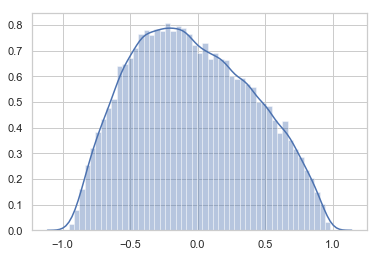

40000it [00:02, 17452.42it/s]


apnews.com huffingtonpost.com
-0.10666249793418352


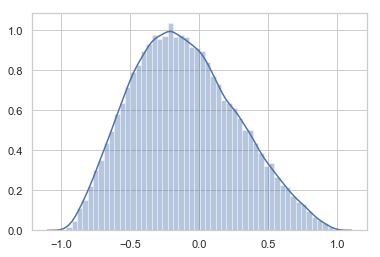

40000it [00:02, 17404.56it/s]


apnews.com nytimes.com
0.11385826084093646


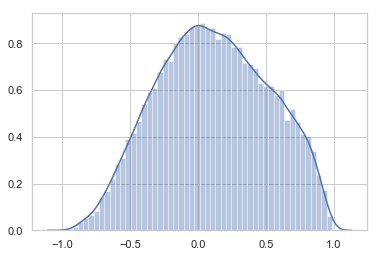

40000it [00:02, 17775.18it/s]


apnews.com foxnews.com
0.1566361093064197


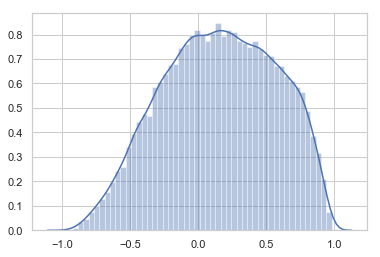

40000it [00:02, 17327.92it/s]


apnews.com cnn.com
0.1175244696148151


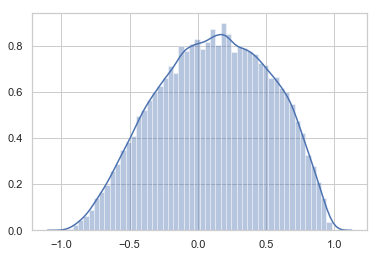

40000it [00:02, 17050.16it/s]


apnews.com breitbart.com
-0.026247786388614115


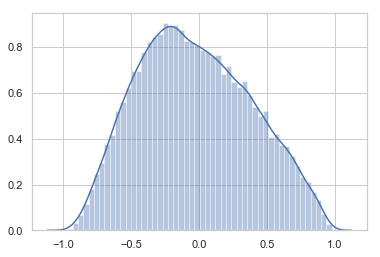

40000it [00:02, 17310.60it/s]


reuters.com huffingtonpost.com
-0.23014171396053415


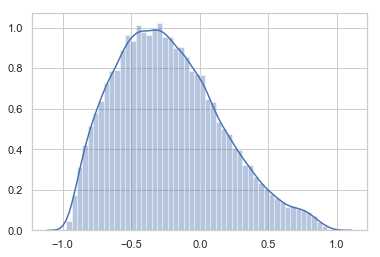

40000it [00:02, 17481.52it/s]


reuters.com nytimes.com
0.031684778993267534


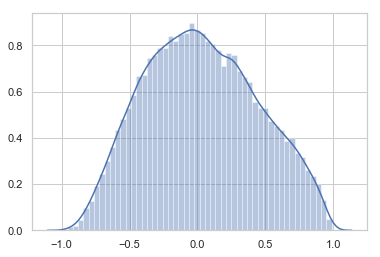

40000it [00:02, 17115.55it/s]


reuters.com foxnews.com
-0.1738901395864719


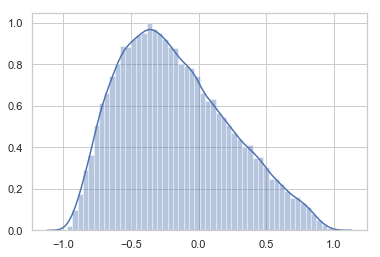

40000it [00:02, 16942.70it/s]


reuters.com cnn.com
-0.1711700566398026


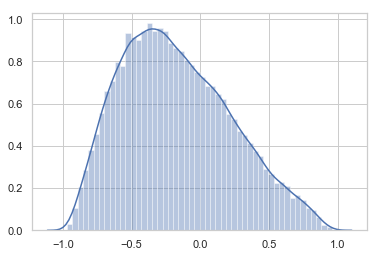

40000it [00:02, 16898.89it/s]


reuters.com breitbart.com
-0.14611778068296402


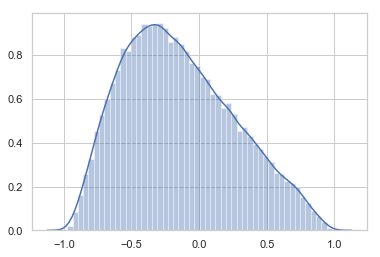

40000it [00:02, 17557.10it/s]


huffingtonpost.com nytimes.com
0.14212664681351797


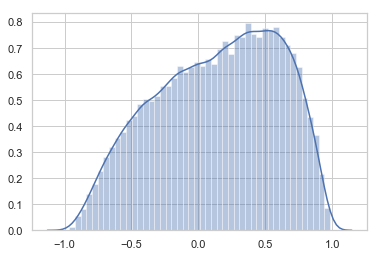

40000it [00:02, 17123.56it/s]


huffingtonpost.com foxnews.com
0.13359535757792568


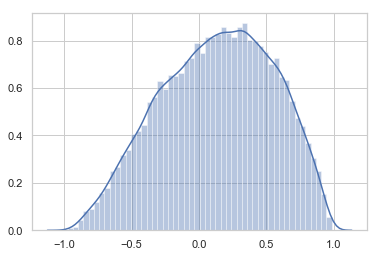

40000it [00:02, 17278.95it/s]


huffingtonpost.com cnn.com
0.1667695967730647


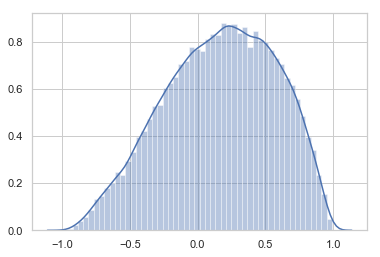

40000it [00:02, 17108.84it/s]


huffingtonpost.com breitbart.com
0.08691058876920901


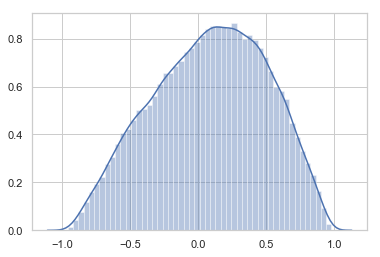

40000it [00:02, 17411.09it/s]


nytimes.com foxnews.com
0.06614586928315856


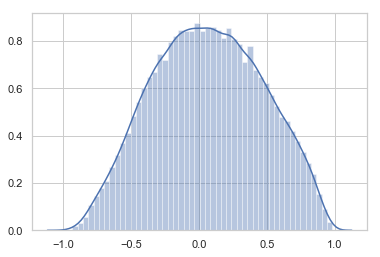

40000it [00:02, 17427.27it/s]


nytimes.com cnn.com
0.09374905025554545


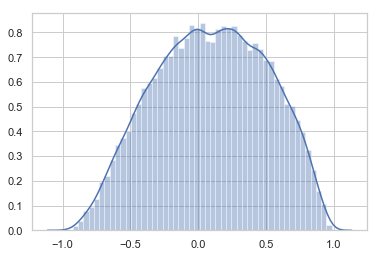

40000it [00:02, 17112.34it/s]


nytimes.com breitbart.com
-0.017478547996234828


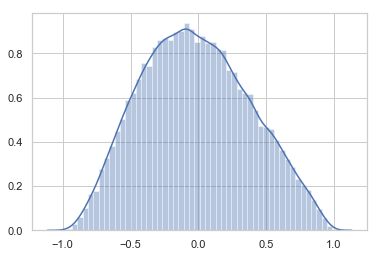

40000it [00:02, 17320.65it/s]


foxnews.com cnn.com
0.20144493806591263


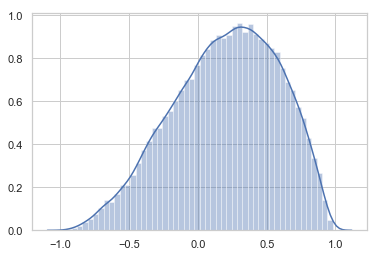

40000it [00:02, 17467.71it/s]


foxnews.com breitbart.com
0.15760496771017127


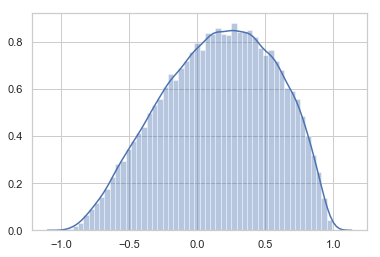

40000it [00:02, 17182.60it/s]


cnn.com breitbart.com
0.07752756585017234


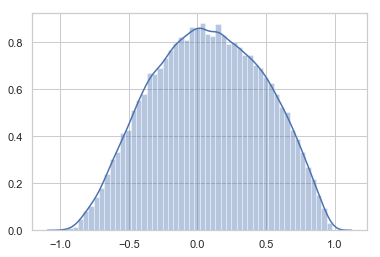

In [63]:
rows = []
for d1, d2 in combinations(df.label.unique(), 2):
    
    ds = pw_product_ds(d1, d2)
    
    print(d1, d2)
    print(np.mean(ds))
    
    sns.distplot(ds)
    plt.show()
    
    rows.append((d1, d2, np.mean(ds)))

In [66]:
rows2 = [(d2, d1, d) for d1, d2, d in rows]

In [67]:
ddf = pd.DataFrame(rows + rows2, columns=('d1', 'd2', 'd'))

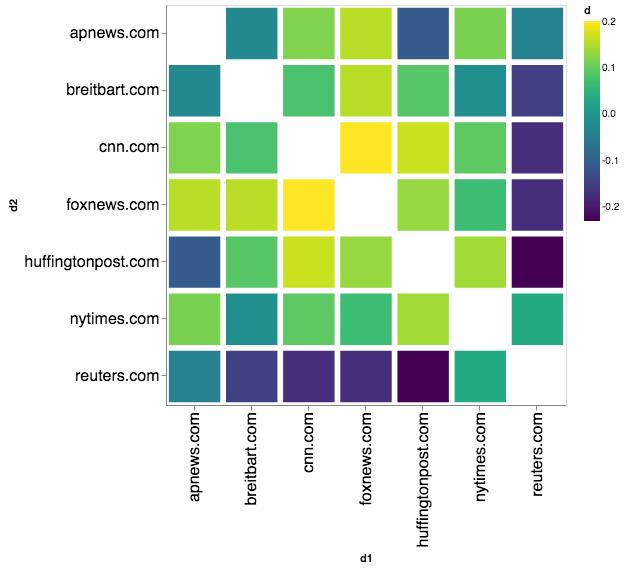

In [69]:
(alt
    .Chart(ddf, width=400, height=400)
    .configure_axis(labelFontSize=16)
    .mark_rect()
    .encode(x='d1:O', y='d2:O', color='d:Q', tooltip='d1'))